In [9]:
from src.data_preprocessing import preprocessing
import os 

# don't forget to change the '/' in the filename to '\\' in windows

In [2]:

dirs = os.listdir("./16NepaliNews/raw")


## no need to run the cell below

In [11]:
def make_directories(folder): # no need to run this now
    for dir in dirs:
        os.makedirs(os.path.join(folder,dir))


In [12]:
def write_file(dir, filename, text):
    folder_name = "Preprocessed"
    path = ".\\" + os.path.join(folder_name, dir, filename )
    
    with open(path, "w", encoding="utf-8") as fp:
        fp.write(text)
    


In [19]:
from nepali_stemmer.stemmer import NepStemmer


def preProcess(folder_start, folder_end):
    punc = preprocessing.Preprocessing()
    #running the simple preprocessing for all files
    for folder in dirs[folder_start: folder_end]: 
        dir = os.getcwd() + "/16NepaliNews/raw/" + folder
        print(folder)
        for file in os.listdir(dir): #remove the list value [:1]
            filename = dir + "/" + file
            
            
            
            text = punc.delPnctuatn(filename=filename, next=True)
            
            
            text = punc.delEngWords(text=text, next=True)
            
            
            text = punc.delNumbers(text=text, next=True)
            
            text = punc.delStopwords(text=text, next=True)
            
            stem = NepStemmer()
            text = stem.stem(text)
            write_file(folder, file, text)
        
        
        



In [4]:
from src.feature_extraction import tfidfvectorizer

counter = tfidfvectorizer.TfidfVectorizer()
# counter.vocabulary(path=".\\Preprocessed\\Technology\\04_11_21_10_39_40.txt")
# counter.vocab

In [5]:
def count_words():
    for folder in dirs:
        dir = os.getcwd() + "\\FilteredPreprocessed\\" + folder
        print(folder)
        count = 0
        
        for file in os.listdir(dir):
            filename = dir +"\\" + file
            counter.vocabulary(path=filename)
            count+=1
        print(count)
count_words()

Business
1408
Education
1296
Entertainment
1309
Health
1301
Interview
1383
Literature
1237
NationalNews
1440
Opinion
1321
Sports
1295
Technology
1372
Tourism
1380
World
1366


In [6]:
# for i in range(1000):
#     print(counter.vocab[list(counter.vocab.keys())[i]], list(counter.vocab.keys())[i])
    
len(counter.vocab)

169205

In [1]:
with open(".\\vocab.txt","w", encoding="utf-8") as fp:
    for key in counter.vocab.keys():
        fp.write(key + " " + str(counter.vocab[key])+"\n")

NameError: name 'counter' is not defined

In [6]:
from src.feature_extraction import tfidfvectorizer
import pickle

In [7]:
def DTermSet(path, pickle_filename):
    counter = tfidfvectorizer.TfidfVectorizer()
    
    counter.documentTermMat(path)
    dterm = counter.vec
    counter.label(path)
    vocab = counter.vocab
    doc_label = counter.label_dict

    all_info = {
        "docTerm" : dterm,
        "doc_label" : doc_label,
        "vocab" : vocab
    }
    # counter.tf_idf()
    print(len(all_info))
    filename = open(pickle_filename,'wb')
    pickle.dump(all_info, filename)
    filename.close()
    print(len(all_info))
    return all_info
    

In [ ]:
DTermSet(".\\DocSets\\Set0", ".\\dterm_pickle_files\\Set0.pkl")

In [4]:
DTermSet(".\\DocSets\\Set1", ".\\dterm_pickle_files\\Set1.pkl")

3 left of 341 of Set1                                    
3


{'docTerm': array([[3., 1., 8., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 5., 1., 1.]], dtype=float32),
 'doc_label': {'Business': [1, 352],
  'Education': [353, 676],
  'Entertainment': [677, 1003],
  'Health': [1004, 1328],
  'Interview': [1329, 1673],
  'Literature': [1674, 1982],
  'NationalNews': [1983, 2342],
  'Opinion': [2343, 2672],
  'Sports': [2673, 2995],
  'Technology': [2996, 3338],
  'Tourism': [3339, 3683],
  'World': [3684, 4024]},
 'vocab': {'जिल्ला': [1658, 0],
  'प्रशासन': [360, 1],
  'कार्यालय': [1097, 2],
  'तनहुँ': [70, 3],
  'महिना': [1219, 4],
  'अवधि': [429, 5],
  'रु': [537, 6],
  'करोड': [1330, 7],
  'बढी': [2107, 8],
  'राजश्व': [74, 9],
  'सङ्कलन': [110, 10],
  'चालु': [125, 11],
  'आर्थिक': [1274, 12],
  'वर्ष': [3859, 13],
  '÷': [83, 14],
  'साउन': [292, 15],
  'असोज': [509, 16],
  'मस

In [5]:
DTermSet(".\\DocSets\\Set2", ".\\dterm_pickle_files\\Set2.pkl")

3 left of 341 of Set2                                    
3


{'docTerm': array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.]], dtype=float32),
 'doc_label': {'Business': [1, 352],
  'Education': [353, 676],
  'Entertainment': [677, 1003],
  'Health': [1004, 1328],
  'Interview': [1329, 1673],
  'Literature': [1674, 1982],
  'NationalNews': [1983, 2342],
  'Opinion': [2343, 2672],
  'Sports': [2673, 2995],
  'Technology': [2996, 3338],
  'Tourism': [3339, 3683],
  'World': [3684, 4024]},
 'vocab': {'महिना': [1179, 0],
  'अगाडी': [2, 1],
  'सञ्चालन': [1585, 2],
  'आए': [3372, 3],
  'ईकमर्श': [5, 4],
  'कम्पनी': [1769, 5],
  'आलिया': [18, 6],
  'बजार': [1276, 7],
  'नेपाली': [3384, 8],
  'पहिरन': [40, 9],
  'प्रवर्द्धन': [120, 10],
  'थाले': [763, 11],
  'ढाका': [21, 12],
  'पस्मिना': [2, 13],
  'लगायत': [921, 14],
  'पहिचान': [432, 15],
  'बोके': [140, 16],


In [6]:
DTermSet(".\\DocSets\\Set3", ".\\dterm_pickle_files\\Set3.pkl")

3 left of 341 of Set3                                    
3


{'docTerm': array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.]], dtype=float32),
 'doc_label': {'Business': [1, 352],
  'Education': [353, 676],
  'Entertainment': [677, 1003],
  'Health': [1004, 1328],
  'Interview': [1329, 1673],
  'Literature': [1674, 1982],
  'NationalNews': [1983, 2342],
  'Opinion': [2343, 2672],
  'Sports': [2673, 2995],
  'Technology': [2996, 3338],
  'Tourism': [3339, 3683],
  'World': [3684, 4024]},
 'vocab': {'कक्षा': [498, 0],
  'परीक्षा': [540, 1],
  'दिएर': [278, 2],
  'बसे': [552, 3],
  'विद्यार्थी': [1299, 4],
  'लक्षित': [200, 5],
  'काठमाडौ': [31, 6],
  'डिल्लीबजार': [4, 7],
  'सफ्टवेरि': [3, 8],
  'कलेज': [363, 9],
  'बेलायत': [494, 10],
  'कोभेन्ट्री': [3, 11],
  'विश्वविद्यालय': [372, 12],
  'सहकार्य': [404, 13],
  'नेपाल': [8587, 14],
  'आईओटी': [2, 15],
  

In [2]:
p0 = open(".\\dterm_pickle_files\\Set0.pkl",'rb')
all_info0 = pickle.load(p0)
p0.close()

p1 = open(".\\dterm_pickle_files\\Set1.pkl",'rb')
all_info1 = pickle.load(p1)
p1.close()

p2 = open(".\\dterm_pickle_files\\Set2.pkl",'rb')
all_info2 = pickle.load(p2)
p2.close()

p3 = open(".\\dterm_pickle_files\\Set3.pkl",'rb')
all_info3 = pickle.load(p3)
p3.close()

In [8]:
len(all_info0)
len(all_info1)
len(all_info2)
len(all_info3)


3

In [7]:
def TFIDF(dt_name, pickle_filename):
    tfidf_obj= tfidfvectorizer.TfidfVectorizer()
    tfidf = tfidf_obj.tf_idf(dt_name)
    filename = open(pickle_filename, 'wb')
    pickle.dump(tfidf, filename)
    filename.close()
    return tfidf


In [8]:
type(all_info0['docTerm'])

numpy.ndarray

In [9]:
TFIDF(all_info0['docTerm'], ".\\tfidf_pickle_files\\Set0.pkl")
TFIDF(all_info1['docTerm'], ".\\tfidf_pickle_files\\Set1.pkl")
TFIDF(all_info2['docTerm'], ".\\tfidf_pickle_files\\Set2.pkl")
TFIDF(all_info3['docTerm'], ".\\tfidf_pickle_files\\Set3.pkl")


array([[0.02354528, 0.02729386, 0.02260106, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0728073 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05886547,
        0.05886547]], dtype=float32)

In [10]:
tfidf0 = pickle.load(open(".\\tfidf_pickle_files\\Set0.pkl",'rb'))
tfidf1 = pickle.load(open(".\\tfidf_pickle_files\\Set1.pkl",'rb'))
tfidf2 = pickle.load(open(".\\tfidf_pickle_files\\Set2.pkl",'rb'))
tfidf3 = pickle.load(open(".\\tfidf_pickle_files\\Set3.pkl",'rb'))


In [26]:
# sum_col0 = tfidf0.sum(axis=0)
# avg_col0 = sum_col0/len(tfidf0)
# avg_col0

# tfidf = > [tfidf0, tfidf1, tfidf2, tfidf3]
# returns avg_col = [avg_col0, avg_col1, avg_col2, avg_col3]
def avg_col(tfidf):
    sum_col = tfidf.sum(axis=0)
    avg_col = sum_col/len(tfidf)
    return avg_col



array([1.8546808e-03, 3.3876726e-03, 3.3326766e-03, ..., 1.7935930e-05,
       1.4225049e-05, 1.4225049e-05], dtype=float32)

In [27]:
from numpy import percentile
# arr = []
# fns = percentile(avg_col0, [0,25,50,75,100])
# for i in range(len(fns)):
#     arr.append(fns[i])
# arr

# tfidf => [tfidf0, tfidf1, tfidf2, tfidf3]
# returns perc=> [perc0, perc1, perc2, perc3]
def get_percentile(tfidf, arr=[0,25,50,75,100]):
    perc = []
    for i in range(len(arr)):
        perc.append(percentile(tfidf, arr[i]))
    return perc

[1.5415785128425341e-06,
 3.268830596425687e-06,
 1.1786469258368015e-05,
 2.6720448659034446e-05,
 0.007250951137393713]

In [40]:
# indexes to be thrown away (deleted away)
# avg_col => [avg_col0, avg_col1, avg_col2, avg_col3]
# returns throw_index=> [throw_index0, throw_index1, throw_index2, throw_index3]

throw_index = avg_col0.argsort()[:len(avg_col0)//2]

In [32]:
# index value greater than the threshold
# avg_col => [avg_col0, avg_col1, avg_col2, avg_col3]
# returns sorted_avg_col=> [sorted_avg_col0, sorted_avg_col1, sorted_avg_col2, sorted_avg_col3]

sorted_avg_col0 = len(avg_col0.argsort()[(len(avg_col0)+1)//2:])
sorted_avg_col0

36558

In [37]:
# equal or not
arr[2] - avg_col0[avg_col0.argsort()[(len(avg_col0)+1)//2]]

0.0

In [43]:
# percentage of the documents that are thrown away
(36559/73117)*100

50.00068383549653

In [45]:

import numpy as np
# test_tf_idf0 = all_info0['docTerm']
# for i in throw_index:
#     np.delete(test_tf_idf0, i, axis=1)
# len(test_tf_idf0)

# doc_term => [all_info0['docTerm'], all_info1['docTerm'], all_info2['docTerm'], all_info3['docTerm']]
# throw_index => [throw_index0, throw_index1, throw_index2, throw_index3]
# returns doc_term=> [doc_term0, doc_term1, doc_term2, doc_term3]
def delete_doc(doc_term, throw_index):
    for i in throw_index:
        np.delete(doc_term, i, axis=1)
    return doc_term

KeyboardInterrupt: 

In [39]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
S=svd.fit_transform(all_info["docTerm"])

In [41]:
S.shape

(4024, 100)

In [44]:
from numpy.linalg import svd as SVD
u, s, vh = SVD(all_info["docTerm"], full_matrices=False)
print(u.shape, s.shape, vh.shape)

(4024, 4024) (4024,) (4024, 74553)


In [1]:
import pickle

with open(".\\pickle_files\\Set3.pkl", "rb") as fp:
    all_info = pickle.load(fp)


In [2]:
from src.feature_extraction import plsa
 
# extractor = plsa.PLSA(all_info["docTerm"].shape[0], 12, all_info["docTerm"].shape[1], all_info["docTerm"][100, 1000])
# extractor.plsa(100, 0.1)

In [4]:
extractor = plsa.Corpus(all_info["docTerm"][:1000, :10000])

extractor.plsa(12, 50, 0.1)

EM iteration begins...
Initializing...
doc  topic.....
topic word.....
Iteration #1...
E step:
L1:  19999999.99999992
M step:


e:\Project\NewsTextClassifierSeventhProject\src\feature_extraction\plsa.py:288: RuntimeWarning: divide by zero encountered in log
  self.likelihoods.append(np.sum(np.log(self.document_topic_prob @ self.topic_word_prob) * self.term_doc_matrix))
e:\Project\NewsTextClassifierSeventhProject\src\feature_extraction\plsa.py:288: RuntimeWarning: invalid value encountered in multiply
  self.likelihoods.append(np.sum(np.log(self.document_topic_prob @ self.topic_word_prob) * self.term_doc_matrix))


nan
Iteration #2...
E step:


e:\Project\NewsTextClassifierSeventhProject\src\feature_extraction\plsa.py:247: RuntimeWarning: invalid value encountered in true_divide
  self.topic_prob[doc, :, voc] /= self.topic_prob[doc, :, voc].sum()


L1:  nan
M step:
nan
Iteration #3...
E step:
L1:  nan
M step:
nan
Iteration #4...
E step:


KeyboardInterrupt: 

In [13]:
all_info["docTerm"][:100].sum(axis=1)

array([129.,  94., 109.,  96.,  86., 101., 232., 110., 239., 138.,  87.,
       230., 126., 135., 133., 142.,  99., 147., 182., 140., 115., 216.,
       242., 108.,  92., 104., 126., 128., 145., 188., 114., 123., 152.,
       136., 130., 108., 138., 142., 179., 226., 201.,  87., 166., 202.,
       219., 112., 212., 150., 142., 151., 138., 229.,  98., 149., 116.,
        91., 128., 106., 236.,  81.,  81., 200.,  96.,  97., 114.,  84.,
        85.,  97.,  85., 120., 170.,  87.,  81., 156., 147.,  98., 160.,
       231.,  88., 123.,  86.,  91., 130., 105., 218., 229., 202.,  89.,
       207., 248., 143., 118., 101., 117., 174., 124., 147., 130., 114.,
       234.], dtype=float32)

In [9]:
for i in range(len(s)):
    if s[i] == 0:
        print(i)

In [20]:
import numpy as np
a = np.array([[1, 2, 3],
[2,3,4]])
a.sum(axis=1)

array([6, 9])

In [24]:
assert np.count_nonzero(s) == np.shape(s)[0]

## Visualize the data

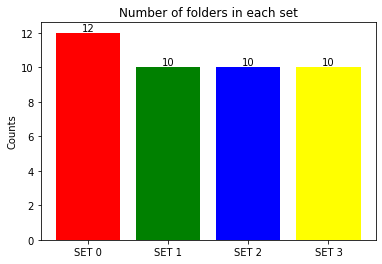

In [14]:
import matplotlib.pyplot as plt
folder_len = []
for i in range(4):
    folder_len.append(len(os.listdir('./DocSets1/Set'+str(i))))

plt.bar(x=['SET 0','SET 1','SET 2','SET 3'],height=folder_len,color=['red','green','blue','yellow'])
plt.title('Number of folders in each set')
plt.ylabel('Counts')
for i in range(len(folder_len)):
        plt.text(i, folder_len[i], folder_len[i], ha='center', va='bottom')
plt.savefig('.\\plots\\category.png', dpi=300, facecolor='w', edgecolor='w')
plt.show()

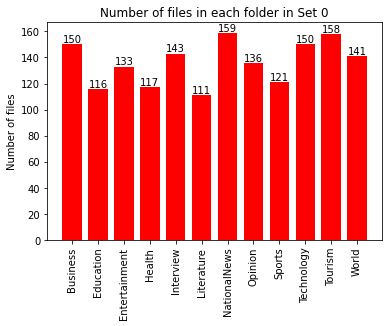

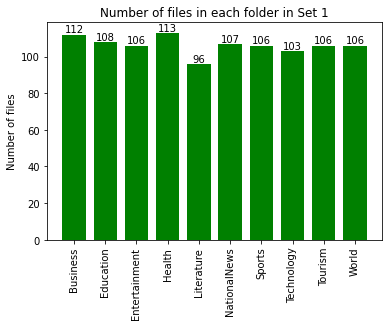

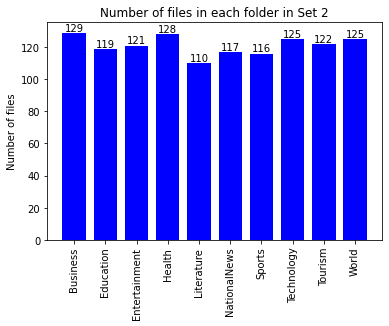

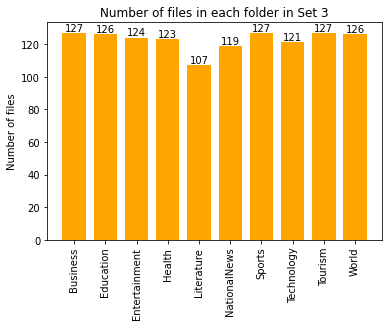

In [15]:
# Length of documents in DocSets1
def plot_bar(path,title,color):

    folder_name = os.listdir(path)
    file_len = []
    for file in folder_name:
        file_len.append(len(os.listdir(os.path.join(path,file))))

    plt.bar(x=range(0,len(folder_name)*2,2),height=file_len, color=color,width=1.5)
    plt.xticks(range(0,len(folder_name)*2,2),folder_name,rotation='vertical')
    plt.title('Number of files in each folder in '+ title)
    plt.ylabel('Number of files')
    for i in range(len(folder_name)):
        plt.text(i*2, file_len[i], file_len[i], ha='center', va='bottom')
    plt.savefig('.\\plots\\fileCountIn'+title+'.png', dpi=300, facecolor='w', edgecolor='w')
    plt.show()

colors = ['red','green','blue','orange']
for i in range(4):
    plot_bar('./DocSets1/Set'+str(i),'Set '+str(i),colors[i])



In [8]:
import numpy as np

In [3]:
def get_label(path):

    from src.feature_extraction import tfidfvectorizer
    x = tfidfvectorizer.TfidfVectorizer()
    x.label(path)
    index = 0
    idx = 0
    row = []
    for i in x.label_dict.keys():
        for j in range(x.label_dict[i][1]-index):
            row.append(idx)
        idx+=1
        index = x.label_dict[i][1]
    return np.array(row)

def get_tf_idf(path):
    from src.feature_extraction import tfidfvectorizer
    x = tfidfvectorizer.TfidfVectorizer()
    x.documentTermMat(path)
    x.tf_idf()
    return x.vec

def get_svd(n,tf_idf):
    from numpy.linalg import svd as SVD
    import numpy as np
    u, s, vh = SVD(tf_idf, full_matrices=False)
    u_reduced = u[:, :n]
    s_reduced = s[:n]
    vh_reduced = vh[:n, :]

    usvh_temp = np.dot(u_reduced, np.diag(s_reduced))
    usvh = np.dot(usvh_temp, vh_reduced)
    return usvh

def split(tf_idf, y_label, test_size):
    import numpy as np
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(tf_idf, y_label, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:
def logistic_regression(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    from sklearn.metrics import classification_report
    return classification_report(y_test, y_pred,zero_division=1)

def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    from sklearn.metrics import classification_report
    return classification_report(y_test, y_pred,zero_division=1)

def svm(X_train, X_test, y_train, y_test):
    from sklearn.svm import SVC
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    from sklearn.metrics import classification_report
    return classification_report(y_test, y_pred,zero_division=1)

In [5]:
# For LSA
def make_pipeline(path,svd_n):
    y_label = get_label(path=path)
    tf_idf = get_tf_idf(path=path)
    usvh = get_svd(svd_n, tf_idf=tf_idf)
    X_train, X_test, y_train, y_test = split( tf_idf=usvh, y_label=y_label, test_size=0.1)
    return X_train, X_test, y_train, y_test
 

In [7]:
arr = [100,50,30,12]

import numpy as np
for i in arr:
    print('SVD_n = ',i)
    X_train, X_test, y_train, y_test = make_pipeline('.\\DocSets1\\Set0',i)
    print(f'Logistic Regression:\t\t\t\t\n ',logistic_regression(X_train, X_test, y_train, y_test))
    print(f'Random Forest:\t\t\t\t\n ',random_forest(X_train, X_test, y_train, y_test))
    print('SVM:\t\t\t\t\n',svm(X_train, X_test, y_train, y_test))
    print('\n')

SVD_n =  100
Logistic Regression:				                                  
                precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.86      0.60      0.71        10
           2       0.90      0.60      0.72        15
           3       0.75      0.43      0.55        14
           4       0.53      0.89      0.67        18
           5       0.86      0.55      0.67        11
           6       0.21      0.71      0.32         7
           7       1.00      0.00      0.00        12
           8       1.00      0.94      0.97        17
           9       0.83      0.94      0.88        16
          10       0.67      0.92      0.77        13
          11       0.73      0.57      0.64        14

    accuracy                           0.68       164
   macro avg       0.77      0.66      0.64       164
weighted avg       0.79      0.68      0.67       164

Random Forest:				
                precision    recall  f1-

In [37]:
arr = [45]
for i in arr:
    print('SVD_n = ',i)
    X_train, X_test, y_train, y_test = make_pipeline('.\\DocSets1\\Set0',i)
    print('Random Forest:\t\t\t\t\n',random_forest(X_train, X_test, y_train, y_test))


SVD_n =  45
Random Forest: f Set0                                     
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.80      0.80      0.80        10
           2       1.00      0.80      0.89        15
           3       0.79      0.79      0.79        14
           4       0.83      0.83      0.83        18
           5       0.82      0.82      0.82        11
           6       0.71      0.71      0.71         7
           7       0.83      0.83      0.83        12
           8       1.00      1.00      1.00        17
           9       0.88      0.94      0.91        16
          10       0.77      0.77      0.77        13
          11       0.71      0.86      0.77        14

    accuracy                           0.83       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.83      0.83      0.83       164



## PLSA Metrics

### function to load pickle file and split into train and test.
<table>
<tr><th colspan=2>Parameters:</th></tr>
<tr><td>    - path_label</td><td>path to raw files to get y-label </td></tr>
<tr><td>    - path_prob_docT </td><td>path to doc_t_prob.pkl (document-term probability) </td></tr>
<tr><td>    - path_prob_t_word</td><td> path to t_word_prob.pkl (term-word probability) </td></tr>
</table>

In [6]:

def PLSA_X (path_label,path_prob_docT,path_prob_t_word):
    import pickle
    import numpy as np
    with open(path_prob_docT,'rb') as handle:
        prob_docT = pickle.load(handle)
    
    with open(path_prob_t_word, 'rb') as handle:
        prob_t_word = pickle.load(handle)
    plsaX = np.dot(prob_docT,prob_t_word) 
    return split(tf_idf=plsaX, y_label=get_label(path_label), test_size=0.1)


In [9]:
X_train_set0, X_test_set0, y_train_set0, y_test_set0 = PLSA_X('.\\DocSets1\\Set0','.\\pickles\\Set0\\doc_t_prob.pkl','.\\pickles\\Set0\\t_word_prob.pkl')
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = PLSA_X('.\\DocSets1\\Set1','.\\pickles\\Set1\\doc_t_prob.pkl','.\\pickles\\Set1\\t_word_prob.pkl')
X_train_set2, X_test_set2, y_train_set2, y_test_set2 = PLSA_X('.\\DocSets1\\Set2','.\\pickles\\Set2\\doc_t_prob.pkl','.\\pickles\\Set2\\t_word_prob.pkl')
X_train_set3, X_test_set3, y_train_set3, y_test_set3 = PLSA_X('.\\DocSets1\\Set3','.\\pickles\\Set3\\doc_t_prob.pkl','.\\pickles\\Set3\\t_word_prob.pkl')


In [10]:

def plsa_model(X_train, X_test, y_train, y_test,i):
    print('For set',i,end='\n')
    print('Logistic Regression:\t\t\t\t\t\n ',logistic_regression(X_train, X_test, y_train, y_test))
    print('\n')
    print('Random Forest:\t\t\t\t\t\n ',random_forest(X_train, X_test, y_train, y_test))
    print('\n')
    print('SVM:\t\t\t\t\t\n ',svm(X_train, X_test, y_train, y_test))
    print('\n')

In [11]:
plsa_model(X_train_set0, X_test_set0, y_train_set0, y_test_set0,0)

For set 0
Logistic Regression:					
                precision    recall  f1-score   support

           0       1.00      0.00      0.00        17
           1       1.00      0.00      0.00        10
           2       1.00      0.00      0.00        15
           3       1.00      0.00      0.00        14
           4       1.00      0.00      0.00        18
           5       1.00      0.00      0.00        11
           6       0.04      1.00      0.08         7
           7       1.00      0.00      0.00        12
           8       1.00      0.00      0.00        17
           9       1.00      0.00      0.00        16
          10       1.00      0.00      0.00        13
          11       1.00      0.00      0.00        14

    accuracy                           0.04       164
   macro avg       0.92      0.08      0.01       164
weighted avg       0.96      0.04      0.00       164



Random Forest:					
                precision    recall  f1-score   support

           0    

In [12]:
plsa_model(X_train_set1, X_test_set1, y_train_set1, y_test_set1,1)

For set 1
Logistic Regression:					
                precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.16      1.00      0.27         6
           2       1.00      0.00      0.00        15
           3       1.00      0.00      0.00        16
           4       1.00      0.00      0.00        10
           5       0.05      0.60      0.10         5
           6       0.80      0.40      0.53        10
           7       1.00      0.00      0.00        14
           8       1.00      0.00      0.00         8
           9       1.00      0.00      0.00        11

    accuracy                           0.12       107
   macro avg       0.70      0.20      0.09       107
weighted avg       0.78      0.12      0.07       107



Random Forest:					
                precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.14      0.17      0.15         6
           2    

In [13]:
plsa_model(X_train_set2, X_test_set2, y_train_set2, y_test_set2,2)

For set 2
Logistic Regression:					
                precision    recall  f1-score   support

           0       1.00      0.00      0.00        19
           1       1.00      0.00      0.00        10
           2       1.00      0.00      0.00        11
           3       0.19      0.92      0.31        13
           4       1.00      0.00      0.00        11
           5       1.00      0.00      0.00        13
           6       1.00      0.00      0.00         8
           7       0.16      0.82      0.26        11
           8       1.00      0.00      0.00        13
           9       1.00      0.00      0.00        13

    accuracy                           0.17       122
   macro avg       0.83      0.17      0.06       122
weighted avg       0.84      0.17      0.06       122



Random Forest:					
                precision    recall  f1-score   support

           0       0.39      0.37      0.38        19
           1       0.50      0.60      0.55        10
           2    

In [14]:
plsa_model(X_train_set3, X_test_set3, y_train_set3, y_test_set3,3)

For set 3
Logistic Regression:					
                precision    recall  f1-score   support

           0       1.00      0.00      0.00        18
           1       0.16      1.00      0.28         7
           2       1.00      0.00      0.00        13
           3       0.22      0.75      0.34         8
           4       1.00      0.00      0.00        12
           5       1.00      0.00      0.00        15
           6       0.21      1.00      0.34         8
           7       1.00      0.00      0.00        15
           8       0.21      0.30      0.25        10
           9       1.00      0.00      0.00        17

    accuracy                           0.20       123
   macro avg       0.68      0.30      0.12       123
weighted avg       0.79      0.20      0.08       123



Random Forest:					
                precision    recall  f1-score   support

           0       0.46      0.33      0.39        18
           1       0.33      0.86      0.48         7
           2    

In [2]:
# LSA for n=100
#[Logistic regression, Random Forest, SVM]

def plot_score(acc_list,prec_list,rec_list,f_list,title):
    import numpy as np
    import matplotlib.pyplot as plt
    r = np.arange(3)
    width = 0.18
    plt.figure(figsize=(5,5))
    accuraty_list = acc_list
    bar1 = plt.bar(r,accuraty_list,color='red',edgecolor='black',width=width)
    for i in range(len(accuraty_list)):
        plt.text(i, accuraty_list[i], accuraty_list[i], ha='center', va='bottom')
        

    precision_list = prec_list
    bar2 = plt.bar(r+width,precision_list,color='green',edgecolor='black',width=width)
    for i in range(len(precision_list)):
        plt.text(i+width, precision_list[i], precision_list[i], ha='center', va='bottom')

    recall_list = rec_list
    bar3 = plt.bar(r+width*2,recall_list,color='blue',edgecolor='black',width=width)
    for i in range(len(recall_list)):
        plt.text(i+width*2, recall_list[i], recall_list[i], ha='center', va='bottom')

    f1_list = f_list
    bar4 = plt.bar(r+width*3,f1_list,color='orange',edgecolor='black',width=width)
    for i in range(len(f1_list)):
        plt.text(i+width*3, f1_list[i], f1_list[i], ha='center', va='bottom')

    plt.ylabel('Accuracy')
    plt.title(title)
    plt.xticks(r+width*1.5,['Logistic Regression','Random Forest','SVM'])
    plt.legend((bar1[0],bar2[0],bar3[0],bar4[0]),('Accuracy','Precision','Recall','F1-score'),loc='lower right')

    plt.savefig('.\\plots\\Color'+title+'.png', dpi=300, facecolor='w', edgecolor='w')
    plt.show()
    



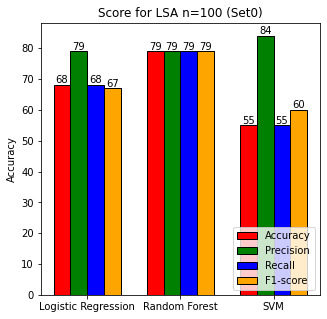

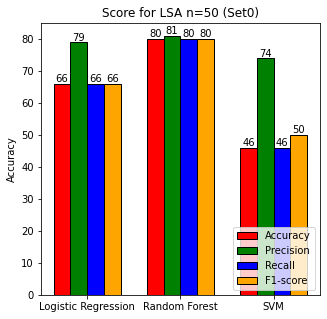

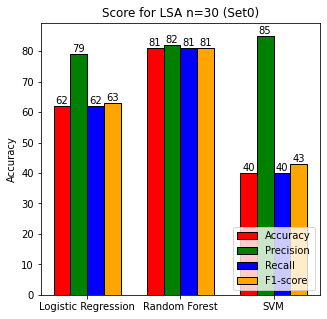

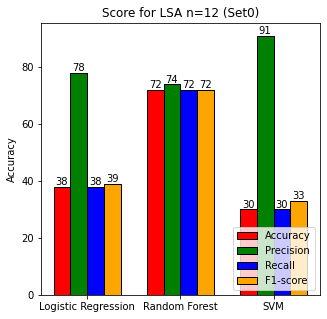

In [3]:
# import matplotlib.pyplot as plt
plot_score([68,79,55],[79,79,84],[68,79,55],[67,79,60],'Score for LSA n=100 (Set0)')
plot_score([66,80,46],[79,81,74],[66,80,46],[66,80,50],'Score for LSA n=50 (Set0)')
plot_score([62,81,40],[79,82,85],[62,81,40],[63,81,43],'Score for LSA n=30 (Set0)')
plot_score([38,72,30],[78,74,91],[38,72,30],[39,72,33],'Score for LSA n=12 (Set0)')
# plt.savefig('LSA_n_100_Set0.png')

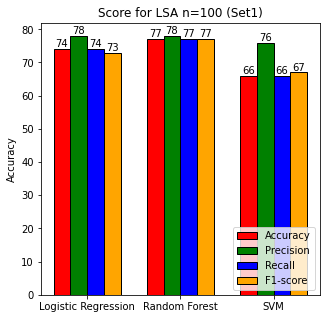

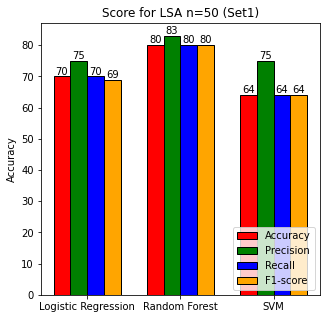

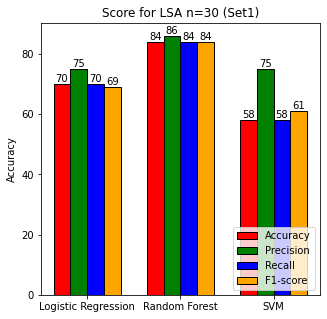

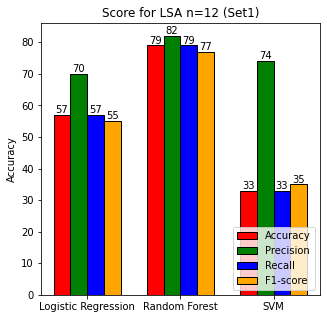

In [4]:
plot_score([74,77,66],[78,78,76],[74,77,66],[73,77,67],'Score for LSA n=100 (Set1)')
plot_score([70,80,64],[75,83,75],[70,80,64],[69,80,64],'Score for LSA n=50 (Set1)')
plot_score([70,84,58],[75,86,75],[70,84,58],[69,84,61],'Score for LSA n=30 (Set1)')
plot_score([57,79,33],[70,82,74],[57,79,33],[55,77,35],'Score for LSA n=12 (Set1)')

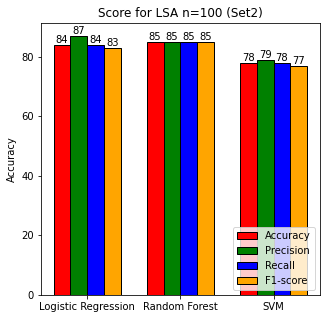

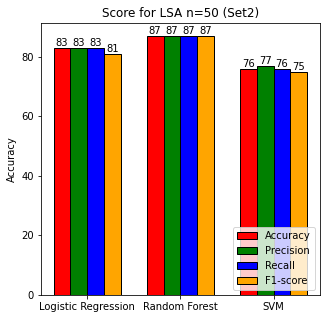

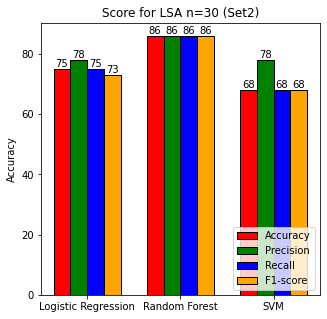

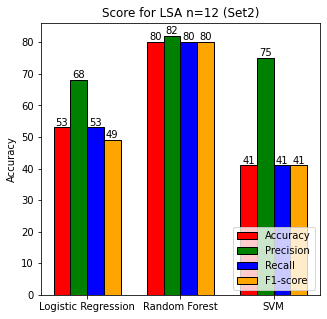

In [5]:
plot_score([84,85,78],[87,85,79],[84,85,78],[83,85,77],'Score for LSA n=100 (Set2)')
plot_score([83,87,76],[83,87,77],[83,87,76],[81,87,75],'Score for LSA n=50 (Set2)')
plot_score([75,86,68],[78,86,78],[75,86,68],[73,86,68],'Score for LSA n=30 (Set2)')
plot_score([53,80,41],[68,82,75],[53,80,41],[49,80,41],'Score for LSA n=12 (Set2)')

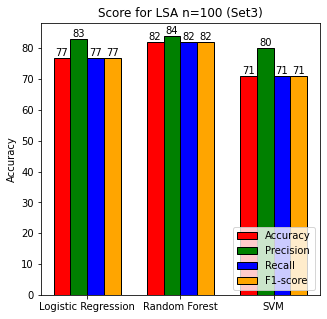

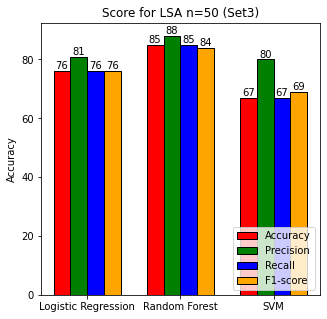

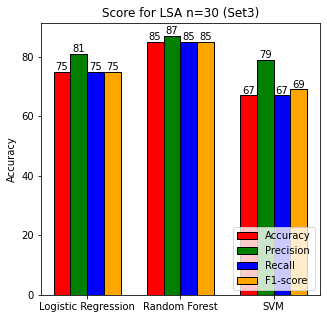

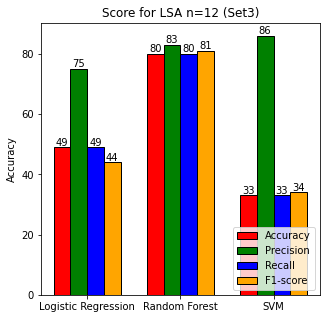

In [6]:
plot_score([77,82,71],[83,84,80],[77,82,71],[77,82,71],'Score for LSA n=100 (Set3)')
plot_score([76,85,67],[81,88,80],[76,85,67],[76,84,69],'Score for LSA n=50 (Set3)')
plot_score([75,85,67],[81,87,79],[75,85,67],[75,85,69],'Score for LSA n=30 (Set3)')
plot_score([49,80,33],[75,83,86],[49,80,33],[44,81,34],'Score for LSA n=12 (Set3)')

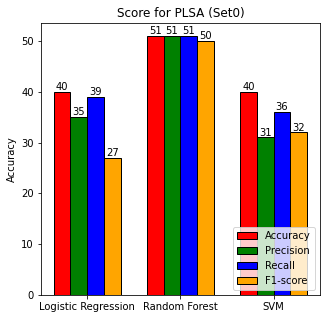

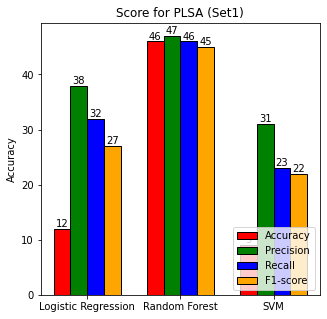

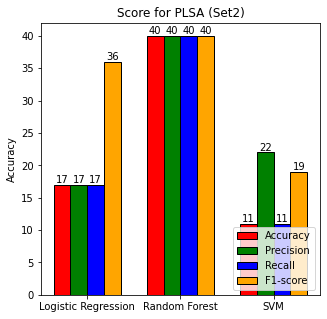

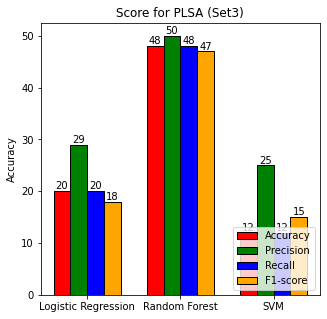

In [3]:
plot_score([40,51,40],[35,51,31],[39,51,36],[27,50,32],'Score for PLSA (Set0)')
plot_score([12,46,9],[38,47,31],[32,46,23],[27,45,22],'Score for PLSA (Set1)')
plot_score([17,40,11],[17,40,22],[17,40,11],[36,40,19],'Score for PLSA (Set2)')
plot_score([20,48,12],[29,50,25],[20,48,12],[18,47,15],'Score for PLSA (Set3)')